<h1 style='text-align:center'><u><strong>SIMPLE MOVING AVERAGES (SMA) CROSSOVER</strong></u>:</h1>

<p>This notebook implements the <strong>Simple Moving Averages (S.M.A.) Crossover </strong> algorithm, defined as the following function:</p>
<br>

$$
SMA_t = \frac{1}{N} \sum_{i=t-N+1}^{t} x_i
$$

<h5><u>Where</u>:</h5>

- $SMA_t$ = Simple moving average at time $t$
- $x_i$ = The value at time $i$ (for example, stock price at time $i$)
- $N$ = The number of periods (e.g., 50-day SM, 200-day SMA)
- $t$ = Current time or data point

<h5><u>Example</u>:</h5>
Using the closing prices of an asset for the past 5 days,

$$\frac{100 + 90 + 110 + 120 + 105}{5} = \frac{525}{5} = 20$$

---

<br>
<br>
<h2 style='text-align:center'><u><strong>DATA PRE-PROCESSING/PROCESSING</strong></u>:</h2>

In [106]:
# Modules

import matplotlib.pyplot as plt
import yahoo_fin.stock_info as yhfin_si
import yahoo_fin.news as yhfin_news
import statsmodels as sm
import seaborn as sns
import pandas as pd
import numpy as np
import re
import os
import backtrader as bt
print('All required dependencies are present!')

All required dependencies are present!


In [ ]:
# Assets Retrieval (2020 - 2023)

## BTC-USD
btc_dfa = yhfin_si.get_data('BTC-USD', start_date='2020-01-01', end_date='2023-12-31', index_as_date=False)

## ETH-USD
eth_dfa = yhfin_si.get_data('ETH-USD', start_date='2020-01-01', end_date='2023-12-31', index_as_date=False)

## SOL-USD
sol_dfa = yhfin_si.get_data('SOL-USD', start_date='2020-01-01', end_date='2023-12-31', index_as_date=False)

## BCH-USD
bch_dfa = yhfin_si.get_data('BCH-USD', start_date='2020-01-01', end_date='2023-12-31', index_as_date=False)

## BNB-USD
bnb_dfa = yhfin_si.get_data('BNB-USD', start_date='2020-01-01', end_date='2023-12-31', index_as_date=False)

## ADA-USD
ada_dfa = yhfin_si.get_data('ADA-USD', start_date='2020-01-01', end_date='2023-12-31', index_as_date=False)

In [111]:
# Local Storage ('datasets' directory)

## Storage
btc_csv = btc_dfa.to_csv('..//datasets//BTC-USD_Historical_Data_[2020-2023].csv')
eth_csv = eth_dfa.to_csv('..//datasets//ETH-USD_Historical_Data_[2020-2023].csv')
sol_csv = sol_dfa.to_csv('..//datasets//SOL-USD_Historical_Data_[2020-2023].csv')
bch_csv = bch_dfa.to_csv('..//datasets//BCH-USD_Historical_Data_[2020-2023].csv')
bnb_csv = bnb_dfa.to_csv('..//datasets//BNB-USD_Historical_Data_[2020-2023].csv')
ada_csv = ada_dfa.to_csv('..//datasets//ADA-USD_Historical_Data_[2020-2023].csv')

In [112]:
# Partioning Between Dates (2020 | 2021 | 2022  2023)

## BTC-USD
btc_dfa['date'] = pd.to_datetime(btc_dfa['date'])
btc_2023 = btc_dfa[btc_dfa['date'] > '2022-12-31']
btc_2022 = btc_dfa[btc_dfa['date'] > '2021-12-31']
btc_2021 = btc_dfa[btc_dfa['date'] > '2020-12-31']
btc_2020 = btc_dfa[btc_dfa['date'] > '2019-12-31']

## ETH-USD
eth_dfa['date'] = pd.to_datetime(eth_dfa['date'])
eth_2023 = eth_dfa[eth_dfa['date'] > '2022-12-31']
eth_2022 = eth_dfa[eth_dfa['date'] > '2021-12-31']
eth_2021 = eth_dfa[eth_dfa['date'] > '2020-12-31']
eth_2020 = eth_dfa[eth_dfa['date'] > '2019-12-31']

## SOL-USD
sol_dfa['date'] = pd.to_datetime(sol_dfa['date'])
sol_2023 = sol_dfa[sol_dfa['date'] > '2022-12-31']
sol_2022 = sol_dfa[sol_dfa['date'] > '2021-12-31']
sol_2021 = sol_dfa[sol_dfa['date'] > '2020-12-31']
sol_2020 = sol_dfa[sol_dfa['date'] > '2019-12-31']

## BCH-USD
bch_dfa['date'] = pd.to_datetime(bch_dfa['date'])
bch_2023 = bch_dfa[bch_dfa['date'] > '2022-12-31']
bch_2022 = bch_dfa[bch_dfa['date'] > '2021-12-31']
bch_2021 = bch_dfa[bch_dfa['date'] > '2020-12-31']
bch_2020 = bch_dfa[bch_dfa['date'] > '2019-12-31']

## BNB-USD
bnb_dfa['date'] = pd.to_datetime(bnb_dfa['date'])
bnb_2023 = bnb_dfa[bnb_dfa['date'] > '2022-12-31']
bnb_2022 = bnb_dfa[bnb_dfa['date'] > '2021-12-31']
bnb_2021 = bnb_dfa[bnb_dfa['date'] > '2020-12-31']
bnb_2020 = bnb_dfa[bnb_dfa['date'] > '2019-12-31']

## ADA-USD
ada_dfa['date'] = pd.to_datetime(ada_dfa['date'])
ada_2023 = ada_dfa[ada_dfa['date'] > '2022-12-31']
ada_2022 = ada_dfa[ada_dfa['date'] > '2021-12-31']
ada_2021 = ada_dfa[ada_dfa['date'] > '2020-12-31']
ada_2020 = ada_dfa[ada_dfa['date'] > '2019-12-31']

In [115]:
btc_2020.head()

,date,open,high,low,close,adjclose,volume,ticker
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,BTC-USD
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,BTC-USD
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,BTC-USD
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,BTC-USD
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,BTC-USD


In [116]:
btc_2020.describe()

,date,open,high,low,close,adjclose,volume
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1.461000e+03
mean,2021-12-31 00:00:00,28869.396834,29525.368922,28164.231668,28890.454091,28890.454091,3.211143e+10
min,2020-01-01 00:00:00,5002.578125,5331.833984,4106.980957,4970.788086,4970.788086,5.331173e+09
25%,2020-12-31 00:00:00,16954.146484,17116.041016,16788.783203,16967.132812,16967.132812,1.996863e+10
50%,2021-12-31 00:00:00,27301.929688,27820.244141,26864.082031,27307.437500,27307.437500,2.909493e+10
75%,2022-12-31 00:00:00,39744.515625,40816.070312,38746.347656,39773.828125,39773.828125,3.925429e+10
max,2023-12-31 00:00:00,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11
std,NaN,15125.326925,15521.866504,14658.782312,15114.075467,15114.075467,1.871790e+10


C:\Users\mquay\AppData\Local\Temp\ipykernel_28292\3791773320.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_2021['close_dist_low'] = btc_2021['close'] - btc_2021['low']
C:\Users\mquay\AppData\Local\Temp\ipykernel_28292\3791773320.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  btc_2021['open_dist_high'] = btc_2021['high'] - btc_2021['open']
C:\Users\mquay\AppData\Local\Temp\ipykernel_28292\3791773320.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

TypeError: text() missing 2 required positional arguments: 'y' and 's'

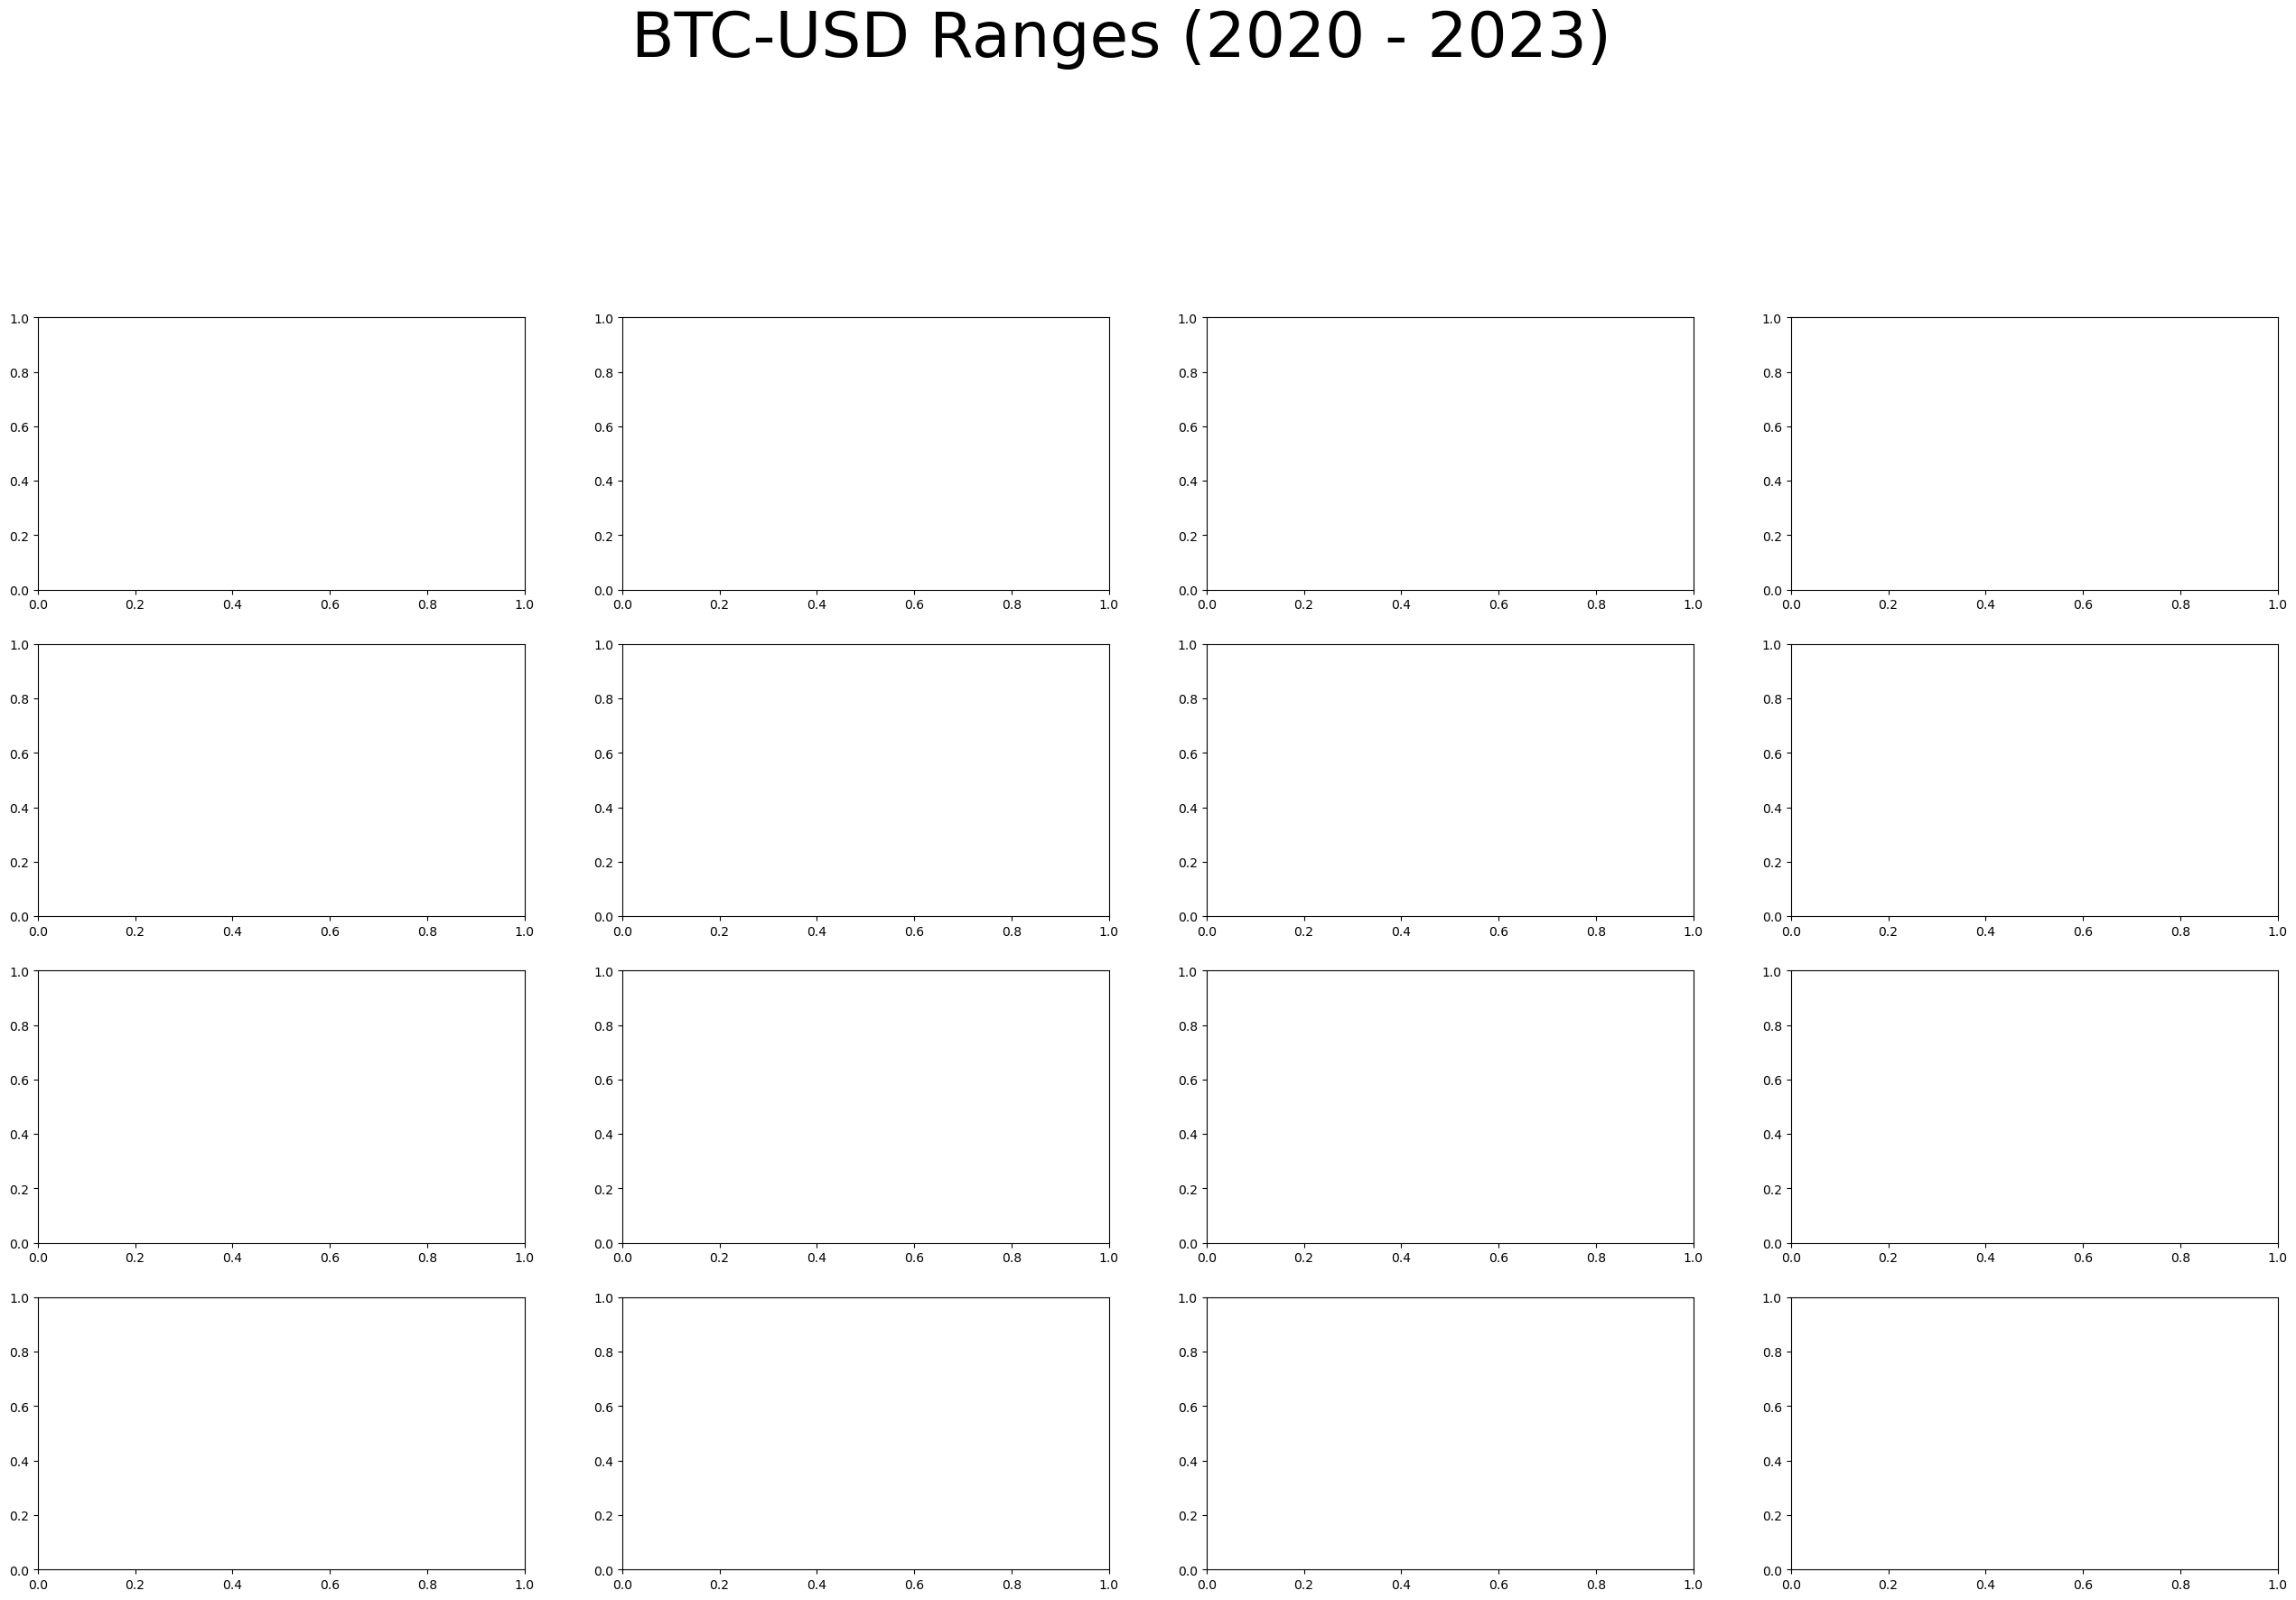

In [ ]:
# BTC-USD Ranges (2020 - 2023)

fig, axes = plt.subplots(4, 4, figsize=(32,18))
plt.suptitle('BTC-USD Ranges (2020 - 2023)', fontsize=50, y=1.07)


## Ranges
### 2020
btc_2020['close_dist_low'] = btc_2020['close'] - btc_2020['low']
btc_2020['open_dist_high'] = btc_2020['high'] - btc_2020['open']
btc_2020['price_range'] = btc_2020['open'] - btc_2020['close']
btc_2020['total_range'] = btc_2020['high'] - btc_2020['low']

### 2021
btc_2021['close_dist_low'] = btc_2021['close'] - btc_2021['low']
btc_2021['open_dist_high'] = btc_2021['high'] - btc_2021['open']
btc_2021['price_range'] = btc_2021['open'] - btc_2021['close']
btc_2021['total_range'] = btc_2021['high'] - btc_2021['low']

### 2022
btc_2022['close_dist_low'] = btc_2022['close'] - btc_2022['low']
btc_2022['open_dist_high'] = btc_2022['high'] - btc_2022['open']
btc_2022['price_range'] = btc_2022['open'] - btc_2022['close']
btc_2022['total_range'] = btc_2022['high'] - btc_2022['low']

### 2023
btc_2023['close_dist_low'] = btc_2023['close'] - btc_2023['low']
btc_2023['open_dist_high'] = btc_2023['high'] - btc_2023['open']
btc_2023['price_range'] = btc_2023['open'] - btc_2023['close']
btc_2023['total_range'] = btc_2023['high'] - btc_2023['low']


## Plots
### 2020
# plt.text('2020')
sns.histplot(btc_2020['close_dist_low'], ax=axes[0][0]).set(xlabel='Opening Distance to High')
sns.histplot(btc_2020['open_dist_high'], ax=axes[0][1]).set(xlabel='Closing Distance to High')
sns.histplot(btc_2020['price_range'], ax=axes[0][2]).set(xlabel='Price Range')
sns.histplot(btc_2020['total_range'], ax=axes[0][3]).set(xlabel='Total Range')

### 2021
# plt.text('2021')
sns.histplot(btc_2021['close_dist_low'], ax=axes[1][0]).set(xlabel='Opening Distance to High')
sns.histplot(btc_2021['open_dist_high'], ax=axes[1][1]).set(xlabel='Closing Distance to High')
sns.histplot(btc_2021['price_range'], ax=axes[1][2]).set(xlabel='Price Range')
sns.histplot(btc_2021['total_range'], ax=axes[1][3]).set(xlabel='Total Range')

### 2022
# plt.text('2022')
sns.histplot(btc_2022['close_dist_low'], ax=axes[2][0]).set(xlabel='Opening Distance to High')
sns.histplot(btc_2022['open_dist_high'], ax=axes[2][1]).set(xlabel='Closing Distance to High')
sns.histplot(btc_2022['price_range'], ax=axes[2][2]).set(xlabel='Price Range')
sns.histplot(btc_2022['total_range'], ax=axes[2][3]).set(xlabel='Total Range')

### 2023
# plt.text('2023')
sns.histplot(btc_2023['close_dist_low'], ax=axes[3][0]).set(xlabel='Opening Distance to High')
sns.histplot(btc_2023['open_dist_high'], ax=axes[3][1]).set(xlabel='Closing Distance to High')
sns.histplot(btc_2023['price_range'], ax=axes[3][2]).set(xlabel='Price Range')
sns.histplot(btc_2023['total_range'], ax=axes[3][3]).set(xlabel='Total Range')

plt.tight_layout(rect=(0,0,1,1))
plt.show()

---

<br>
<br>
<h2 style='text-align:center'><u><strong>DATA PRE-PROCESSING/PROCESSING</strong></u>:</h2>

---

<br>
<br>
<h2 style='text-align:center'><u><strong>DATA PRE-PROCESSING/PROCESSING</strong></u>:</h2>

---

<br>
<br>
<h2 style='text-align:center'><u><strong>DATA PRE-PROCESSING/PROCESSING</strong></u>:</h2>

---